In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D

%matplotlib inline

In [2]:
dataset_train = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_train.csv')
dataset_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
dataset_test = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_test.csv')
dataset_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
print('Number of images in the training set: {}'.format(dataset_train.shape[0]))
print('Number of images in the test set: {}'.format(dataset_test.shape[0]))
d = int((dataset_train.shape[1] - 1)**0.5)
print('Shape of the images: {} x {}'.format(d,d))

Number of images in the training set: 27455
Number of images in the test set: 7172
Shape of the images: 28 x 28


In [5]:
labels = dataset_train['label']
labels_test = dataset_test['label']

In [6]:
dataset_train.drop('label', axis = 1, inplace = True)
print(dataset_train.shape)
dataset_test.drop('label', axis = 1, inplace = True)
print(dataset_test.shape)

(27455, 784)
(7172, 784)


In [7]:
x_train = dataset_train.values.reshape(dataset_train.shape[0],28,28,1)
x_test = dataset_test.values.reshape(dataset_test.shape[0],28,28,1)

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
#plt.imshow(x_train[100].reshape(28,28), cmap='gray')

In [10]:
labels = to_categorical(labels)
y_train=labels
print(labels.shape)
labels_test = to_categorical(labels_test)
y_test=labels_test
print(labels_test.shape)

(27455, 25)
(7172, 25)


In [11]:
model = Sequential()
model.add(Conv2D(100 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 300 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units = 25 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 75)        67575     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 25)        16900     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 25)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 25)          1

In [12]:
model.fit(x_train, y_train,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
275/275 [==============================] - 298s 371ms/step - loss: 2.1671 - accuracy: 0.4005 - val_loss: 2.4183 - val_accuracy: 0.3410
Epoch 2/20
275/275 [==============================] - 98s 356ms/step - loss: 0.1686 - accuracy: 0.9691 - val_loss: 0.6974 - val_accuracy: 0.8965
Epoch 3/20
275/275 [==============================] - 100s 365ms/step - loss: 0.0477 - accuracy: 0.9960 - val_loss: 0.1806 - val_accuracy: 0.9452
Epoch 4/20
275/275 [==============================] - 94s 342ms/step - loss: 0.0221 - accuracy: 0.9980 - val_loss: 0.1495 - val_accuracy: 0.9551
Epoch 5/20
275/275 [==============================] - 99s 361ms/step - loss: 0.0131 - accuracy: 0.9990 - val_loss: 0.1419 - val_accuracy: 0.9571
Epoch 6/20
275/275 [==============================] - 93s 336ms/step - loss: 0.0102 - accuracy: 0.9989 - val_loss: 0.2373 - val_accuracy: 0.9320
Epoch 7/20
275/275 [==============================] - 79s 287ms/step - loss: 0.0062 - accuracy: 0.9995 - val_loss: 0.1716 - val_

In [37]:
history=model.fit(x_train, y_train, epochs=20, batch_size=100)

Epoch 1/20
275/275 [==============================] - 84s 286ms/step - loss: 0.0089 - accuracy: 0.9975
Epoch 2/20
275/275 [==============================] - 72s 262ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 3/20
275/275 [==============================] - 71s 257ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 4/20
275/275 [==============================] - 70s 255ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 5/20
275/275 [==============================] - 70s 255ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 6/20
275/275 [==============================] - 70s 256ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 7/20
275/275 [==============================] - 70s 256ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 8/20
275/275 [==============================] - 71s 258ms/step - loss: 0.0032 - accuracy: 0.9990
Epoch 9/20
275/275 [==============================] - 71s 257ms/step - loss: 0.0083 - accuracy: 0.9975
Epoch 10/20
275/275 [==============================] - 75s 272ms/step - l

In [13]:
#training and test Data
train = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_train.csv')
test = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_train.csv')


In [14]:
#training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [15]:
#training labels
labels = train['label'].values

In [16]:
#the unique labels, 24 in total (np 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

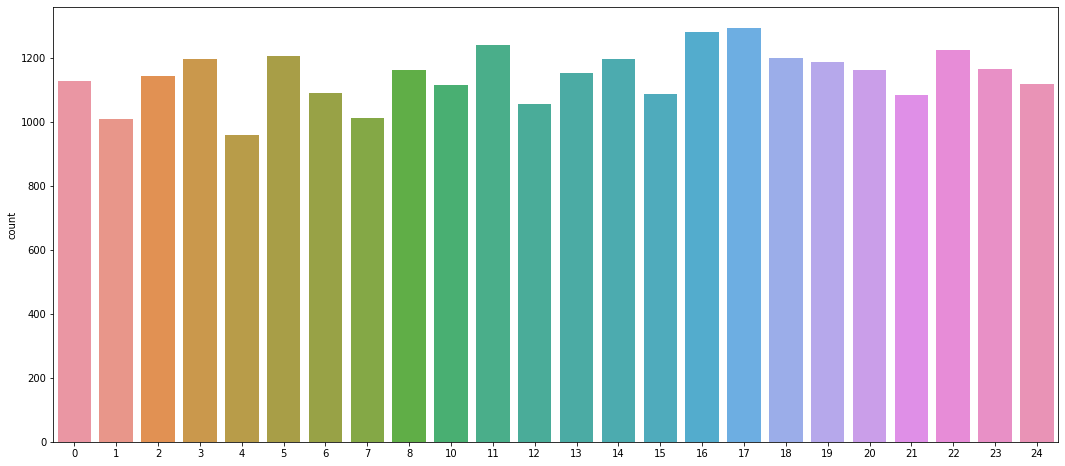

In [17]:
#plot the quantities in each class
import seaborn as sns
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [18]:
labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [20]:
train.drop('label', axis = 1, inplace = True)

In [21]:
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [22]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [23]:
labels


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


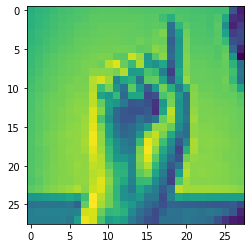

In [27]:
#image inspection
index = 8
print(labels[index])
plt.imshow(images[index].reshape(28,28))

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


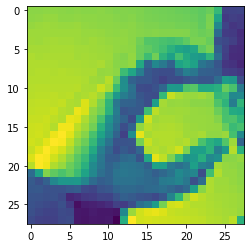

In [26]:
#Example
index = 3
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [28]:
#save our Model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model saved")

Model saved


In [40]:
history.history??

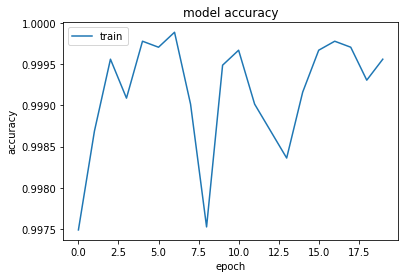

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

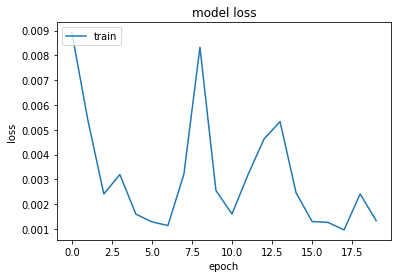

In [43]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

plt.show()